
# Flight Delay Time Statistics

This notebook provides a static analysis of flight delay times using airline data.
It allows you to explore various types of delays by month for a selected year using Matplotlib.


In [1]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the airline data into a pandas DataFrame
airline_data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',
    encoding="ISO-8859-1",
    dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str}
)

# Display the first few rows of the dataset
airline_data.head()


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Run Analysis

Specify the year you would like to analyze, then execute the cells below to generate static plots for each type of delay.


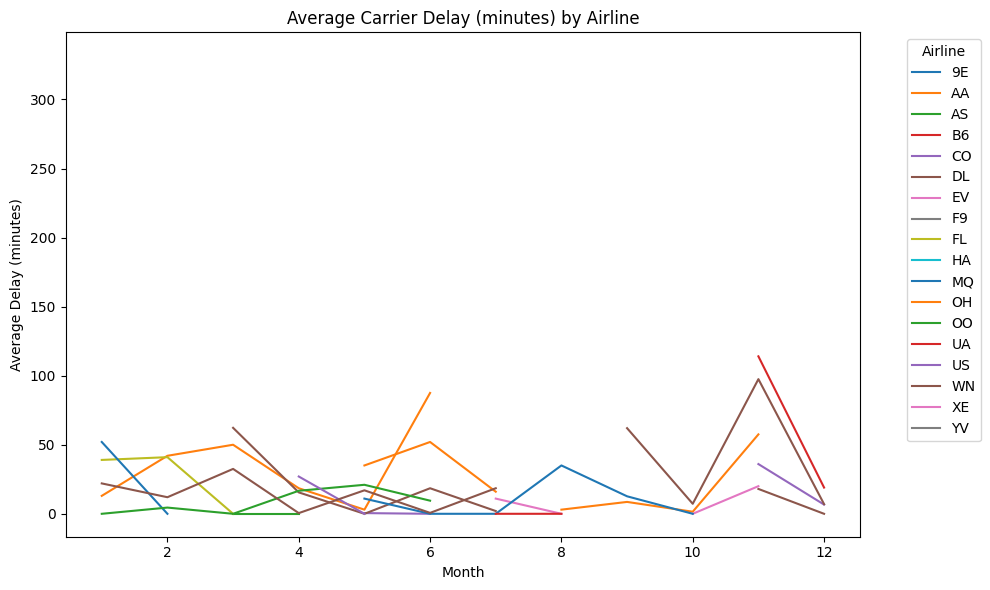

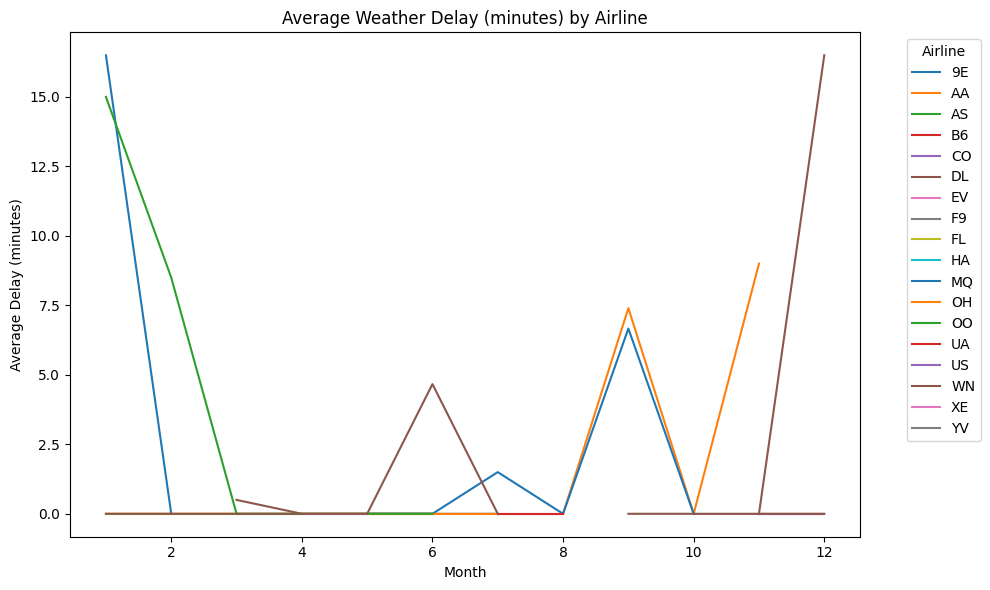

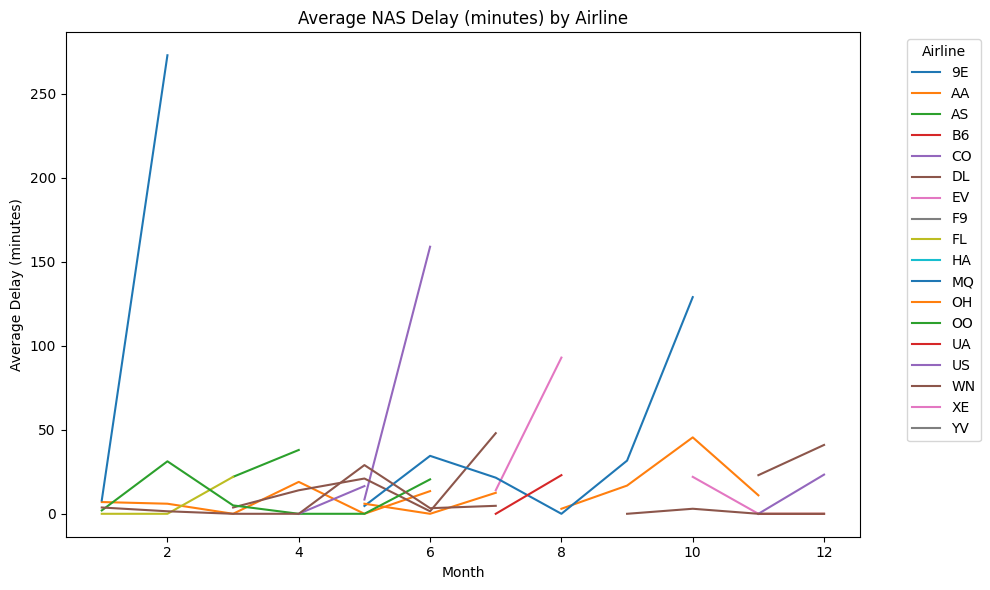

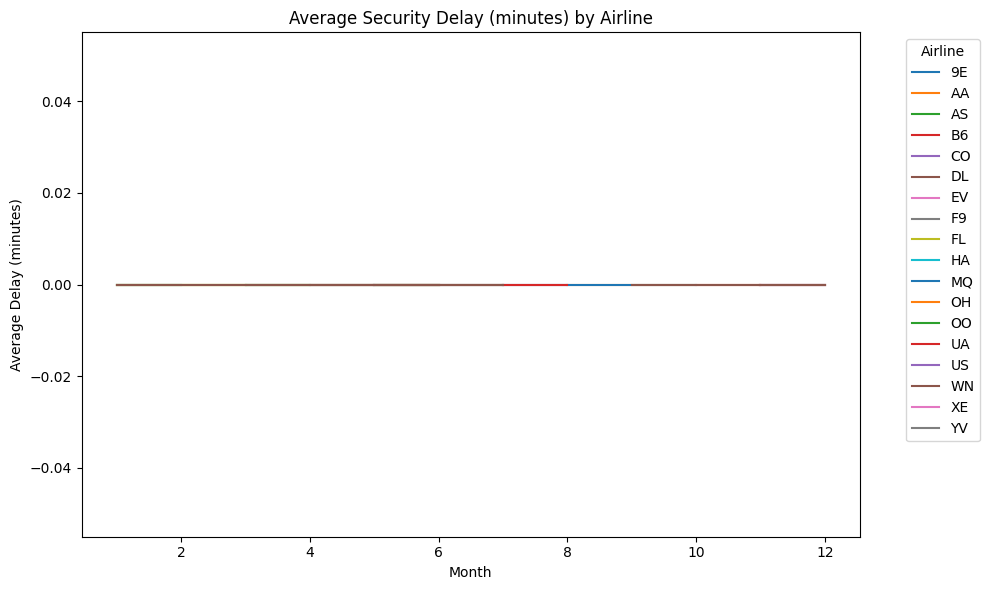

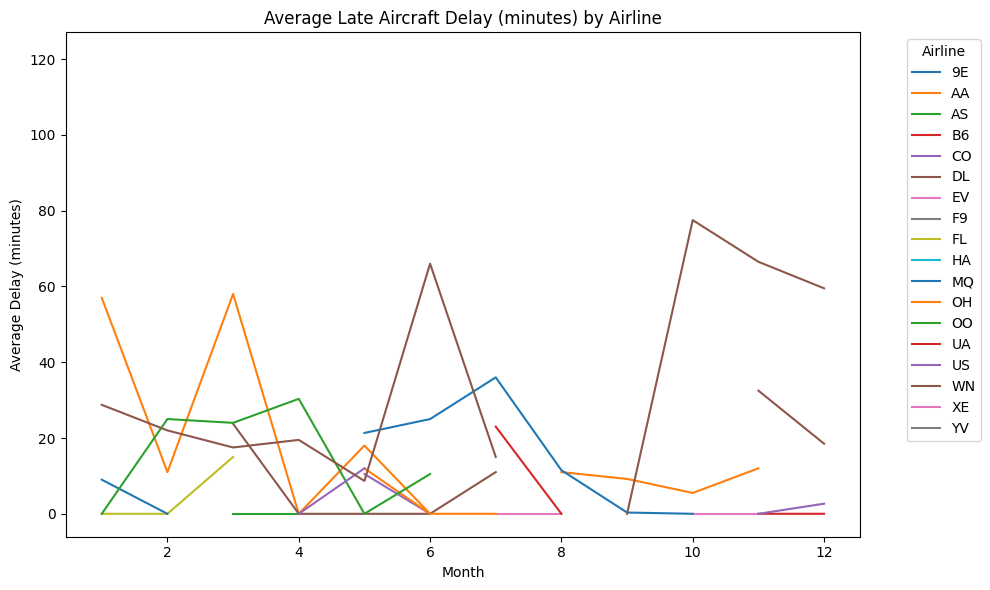

In [3]:

# Set the year for analysis
year = 2010  # Change this to the desired year from 2010 to 2020

# Filter data for the selected year and group by month and airline
df = airline_data[airline_data['Year'] == int(year)]

# Define function for plotting each type of delay
def plot_delay(df, delay_type, title):
    avg_delay = df.groupby(['Month', 'Reporting_Airline'])[delay_type].mean().unstack()
    avg_delay.plot(kind='line', figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Average Delay (minutes)")
    plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot each delay type
plot_delay(df, 'CarrierDelay', 'Average Carrier Delay (minutes) by Airline')
plot_delay(df, 'WeatherDelay', 'Average Weather Delay (minutes) by Airline')
plot_delay(df, 'NASDelay', 'Average NAS Delay (minutes) by Airline')
plot_delay(df, 'SecurityDelay', 'Average Security Delay (minutes) by Airline')
plot_delay(df, 'LateAircraftDelay', 'Average Late Aircraft Delay (minutes) by Airline')
